In [1]:
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

In [2]:
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with cuda
config.path = './baselMorphableModel/' #verify ur path


loading optim config from:  ./optimConfig.ini


In [3]:
import torch

imagePath = './input/detailled_faces_unsplash/BikerMan.jpg' #verify ur path
outputDir = './output/' + os.path.basename(imagePath.strip('/'))
torch.cuda.set_device(0)
optimizer = Optimizer(outputDir ,config)

Loading Basel Face Model 2017 from ./baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


loading image from path:  ./input/detailled_faces_unsplash/BikerMan.jpg
detecting landmarks using: fan


c:\Users\AQ14980\Desktop\repos\NextFace\landmarksfan.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 2/2 [00:01<00:00,  1.67it/s]
took 0.03 minutes to optimize
saving to: ' ./output/BikerMan.jpg/ '. hold on... 
c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\pyredner\image.py:40: UserWarning: ./output/BikerMan.jpg//roughnessMap_0.png is a low contrast image
  skimage.io.imsave(filename,


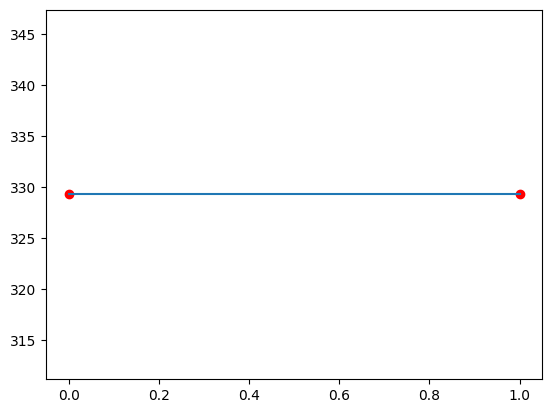

In [4]:
#run the optimization now 
optimizer.run(imagePath,doStep1=False,doStep2=True, doStep3=False)
# optimizer.run(imagePath,checkpoint=outputDir+'/checkpoints/stage1_output.pickle', doStep1=False,doStep2=True, doStep3=False)

Results

Displaying image: _0.png


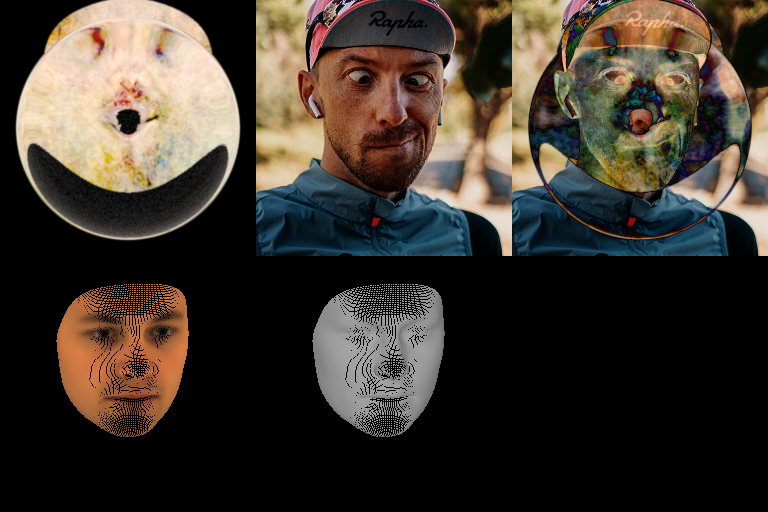

In [5]:
#display results
from IPython.display import Image, display
from IPython.display import Image
import os, glob
# Directory containing the images
dir_path = outputDir + '/debug/debug_step2/mitsuba'

# Get a list of all the .png images in the directory
image_files = glob.glob(os.path.join(dir_path, "*.png"))

# Display each image in turn
for image_file in image_files:
    print(f"Displaying image: {os.path.basename(image_file)}")
    display(Image(filename=image_file))


In [6]:
# # display meshes in polyscope
# import polyscope as ps
# import trimesh
# import glob
# import torch
# import math

# display_meshes = ["debug1_iter0.obj", "debug2_iter0.obj", "debug2_iter1000.obj"]  # replace this with your mesh names

# # Get a list of all .obj files in the directory
# obj_files = glob.glob(os.path.join(outputDir + '/debug/mesh/', "*.obj"))

# # Filter obj_files to only include the ones in display_meshes
# obj_files = [file for file in obj_files if os.path.basename(file) in display_meshes]

# # Define a folder where the screenshots will be saved
# screenshot_folder = outputDir+ "/debug/screenshot_folder"  # replace with your desired folder

# # Check if the folder exists, if not create it
# os.makedirs(screenshot_folder, exist_ok=True)

# # Initialize polyscope
# ps.init()
# # enable auto centering and scaling
# ps.set_autocenter_structures(True)
# ps.set_autoscale_structures(True)
# ps.set_up_dir("neg_y_up")

# # # Show the mesh
# # ps.show()
# # Load and register each mesh to polyscope
# for idx, obj_file in enumerate(obj_files):
#     # mesh_name = os.path.basename(obj_file)  # get the name of the mesh
#     mesh_name = os.path.basename(obj_file)  # get the name of the mesh

#     # Load the mesh from an obj file using trimesh
#     mesh = trimesh.load_mesh(obj_file)
#     # Register the mesh to polyscope
#     ps_mesh = ps.register_surface_mesh(mesh_name, mesh.vertices, mesh.faces)
#     # Reset the transformation on the mesh
#     ps_mesh.reset_transform()
#     # Set a color for the mesh
#     color = torch.tensor([0.5, 0.5, 0.5]).numpy()  # set a fixed color
#     ps_mesh.set_color(color)
#     # Reset the view
#     ps.reset_camera_to_home_view()
#     # Show the mesh
#     ps.show()

#     # Take a screenshot and save it to the specified folder
#     screenshot_name = os.path.join(screenshot_folder, f"{mesh_name}_screenshot.png")
#     ps.screenshot(screenshot_name)

#     # Remove the mesh from polyscope to prepare for the next one
#     ps.remove_all_structures()